In [ ]:
## Dimension reduction methods (PCA,TSNE,ICA) for RNAseq data


In [3]:
library(plotly)
library(DESeq2)

In [4]:
countdata <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/counts_filtered_final_441.csv',row.names=1)
met <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/metadata_all_filtered_final_441.csv',row.names=1)
cols <- met[,'cell']
cols <- as.character(cols)
countdata <- countdata[,cols]

countdata <- countdata[rowSums(countdata>0)>10, ]
countdata <- countdata[rowSums(countdata)>1, ]

geneTypes <- factor( c( ENSM="ENSM", ERCC="ERCC" )[
  substr( rownames(countdata), 1, 4 ) ] )


counts.Mmus <- countdata[ which( geneTypes=="ENSM" ), ]

sizeF.Mmus <- estimateSizeFactorsForMatrix( counts.Mmus )

nCountsMmus <- t( t(counts.Mmus) / sizeF.Mmus )

LogNcountsMmus=log2(nCountsMmus+1)

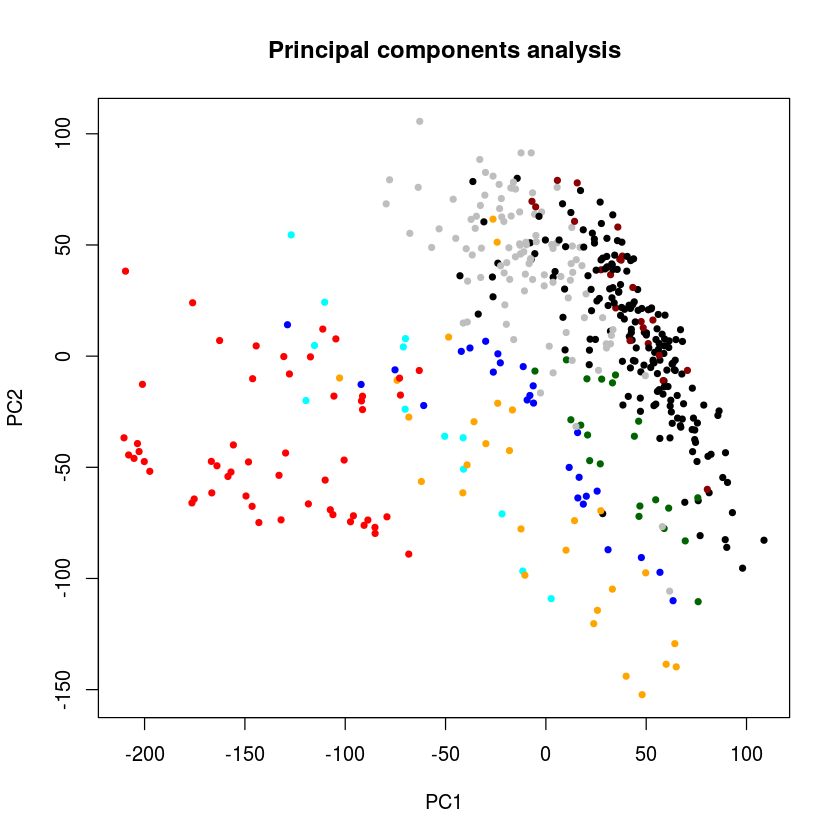

In [6]:
base.pca <- prcomp(t(LogNcountsMmus)) ## Create a prcomp object

plot(base.pca$x[,1],base.pca$x[,2],pch=20,
     col=c("orange","black","darkgreen","cyan","darkred","grey","blue","red")[as.numeric(met$clusterboot)],
     xlab='PC1',ylab='PC2',main='Principal components analysis')

In [15]:
library(Rtsne)

d <- stats::dist(t(LogNcountsMmus))
set.seed(123) 
tsne_out <- Rtsne(d,
                  dims=2,
                  initial_dims=5,
                  is_distance=TRUE, 
                  perplexity=40, 
                  verbose = 2,
                  theta=0.1,pca=T) 

Read the 441 x 441 data matrix successfully!
Using no_dims = 2, perplexity = 40.000000, and theta = 0.100000
Computing input similarities...
Building tree...
 - point 0 of 441
Done in 0.13 seconds (sparsity = 0.434809)!
Learning embedding...
Iteration 50: error is 82.466301 (50 iterations in 0.89 seconds)
Iteration 100: error is 89.066120 (50 iterations in 1.03 seconds)
Iteration 150: error is 95.219299 (50 iterations in 0.82 seconds)
Iteration 200: error is 92.395574 (50 iterations in 0.86 seconds)
Iteration 250: error is 86.758358 (50 iterations in 0.83 seconds)
Iteration 300: error is 2.272437 (50 iterations in 0.83 seconds)
Iteration 350: error is 1.634818 (50 iterations in 0.74 seconds)
Iteration 400: error is 1.473992 (50 iterations in 0.60 seconds)
Iteration 450: error is 1.366949 (50 iterations in 0.54 seconds)
Iteration 500: error is 1.278165 (50 iterations in 0.54 seconds)
Iteration 550: error is 1.255108 (50 iterations in 0.51 seconds)
Iteration 600: error is 1.246684 (50 it

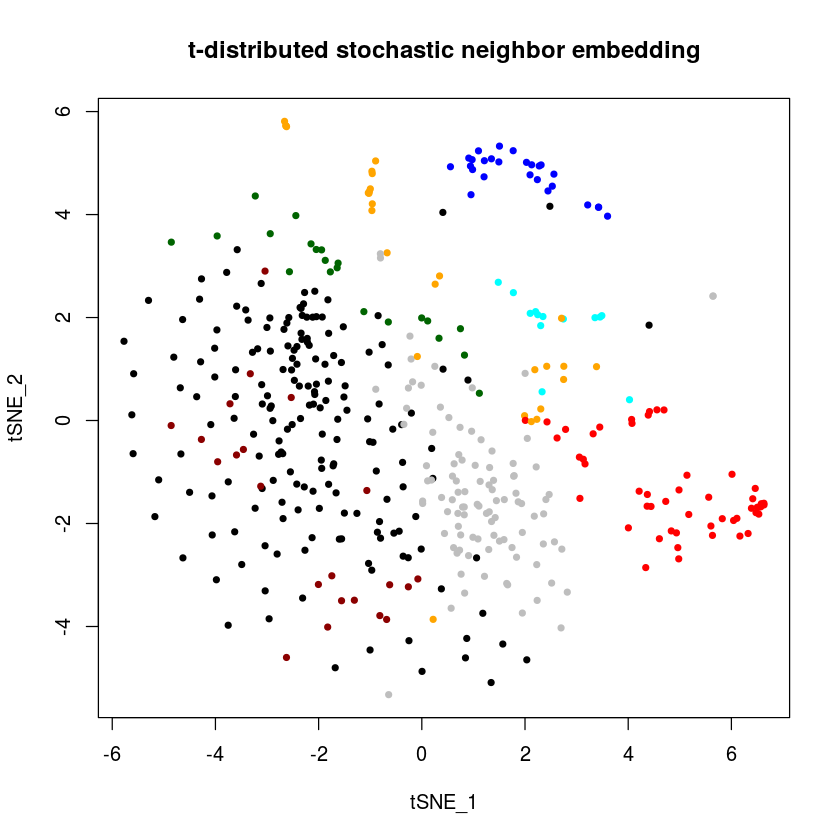

In [16]:
plot(tsne_out$Y[,1],tsne_out$Y[,2],pch=20,
     col=c("orange","black","darkgreen","cyan","darkred","grey","blue","red")[as.numeric(met$clusterboot)],
     xlab='tSNE_1',ylab='tSNE_2',main='t-distributed stochastic neighbor embedding')

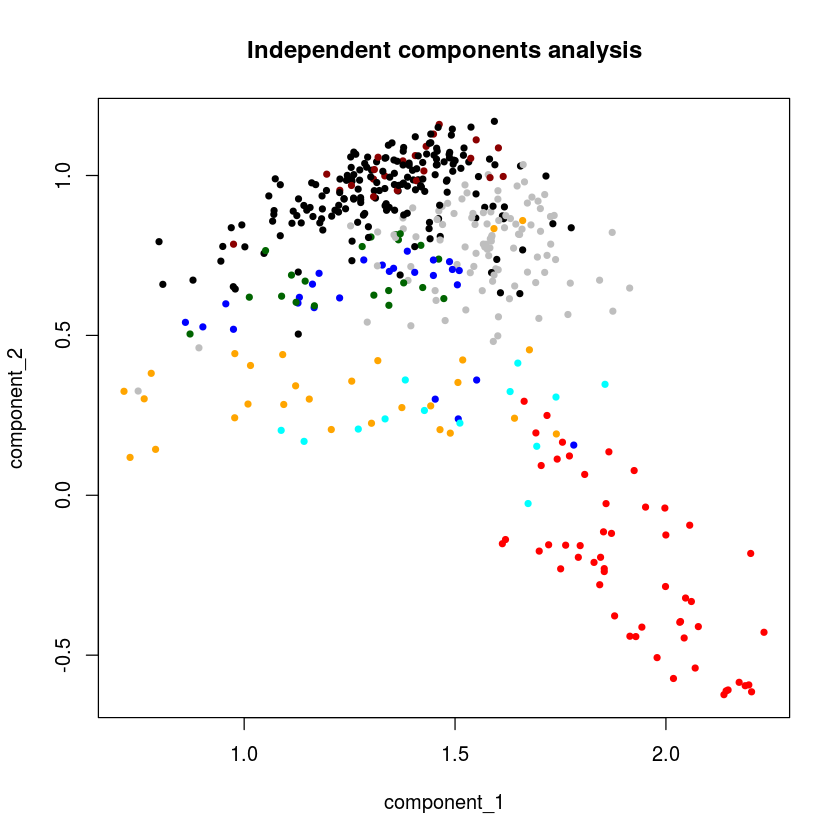

In [5]:
library(fastICA) 

# The data matrix X is considered to be a linear combination of non-Gaussian (independent) components
# i.e. X = SA where columns of S contain the independent components and A is a linear mixing
# matrix. In short ICA attempts to ‘un-mix’ the data by estimating an un-mixing matrix W where XW = S


ics <- fastICA(LogNcountsMmus,2)

plot(ics$A[1,],ics$A[2,],pch=20,
     col=c("orange","black","darkgreen","cyan","darkred","grey","blue","red")[as.numeric(met$clusterboot)],
     xlab='component_1',ylab='component_2',main='Independent components analysis')